In [30]:
!pip install labelme tensorflow tensorflow-gpu opencv-python matplotlib albumentations

Defaulting to user installation because normal site-packages is not writeable
  Using cached labelme-5.8.2-py3-none-any.whl.metadata (1.3 kB)
  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


Requested tensorflow-gpu from https://files.pythonhosted.org/packages/8a/45/fa31ced1db38f9424f262dfbf35747fe5378b5c808cecb373c8cb8e515d3/tensorflow-gpu-2.12.0.tar.gz has invalid metadata: Expected end or semicolon (after name and no valid version specifier)
    python_version>"3.7"
                  ^
Please use pip<24.1 if you need to use this version.
ERROR: Could not find a version that satisfies the requirement tensorflow-gpu (from versions: 2.12.0)
ERROR: No matching distribution found for tensorflow-gpu


In [3]:
import cv2
import uuid
import os
import time
from IPython.display import display, clear_output
from PIL import Image

In [32]:
IMAGES_PATH=os.path.join('data','images')
number_images=30

In [33]:
cap = cv2.VideoCapture(0)
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\imgcodecs\src\loadsave.cpp:929: error: (-215:Assertion failed) !_img.empty() in function 'cv::imwrite'


In [2]:
!labelme


2025-07-13 20:55:01.646 | INFO     | labelme.config:get_config:66 - Loading config file from: C:\Users\sujal\.labelmerc
2025-07-13 20:55:02.390 | DEBUG    | labelme.widgets.canvas:set_ai_model_name:136 - Setting AI model to 'sam2:latest'


In [4]:

import cv2
import json
import numpy as np
from matplotlib import pyplot as plt

In [5]:
import tensorflow as tf

# Must run before anything else that touches TensorFlow
gpus = tf.config.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

print("✅ GPU memory growth enabled for:", gpus)

# Now it's safe to run anything else


✅ GPU memory growth enabled for: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [6]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [11]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [7]:
print("helllo")

helllo


In [11]:
images=tf.data.Dataset.list_files('data\\images\\*.jpg',shuffle=True)

InvalidArgumentError: Expected 'tf.Tensor(False, shape=(), dtype=bool)' to be true. Summarized data: b'No files matched pattern: data\\images\\*.jpg'

In [12]:
images.as_numpy_iterator().next()

NameError: name 'images' is not defined

In [9]:
def load_image(x):
    byte_img=tf.io.read_file(x)
    img=tf.io.decode_jpeg(byte_img)
    return img

In [10]:
images=images.map(load_image)

NameError: name 'images' is not defined

In [10]:
images.as_numpy_iterator().next()

array([[[ 84,  56,  71],
        [ 82,  55,  70],
        [ 81,  55,  68],
        ...,
        [206, 211, 205],
        [205, 211, 207],
        [206, 212, 208]],

       [[ 81,  54,  69],
        [ 80,  56,  69],
        [ 80,  58,  70],
        ...,
        [205, 210, 204],
        [205, 210, 206],
        [205, 210, 206]],

       [[ 75,  55,  66],
        [ 76,  59,  69],
        [ 79,  62,  72],
        ...,
        [207, 209, 204],
        [205, 207, 204],
        [203, 205, 202]],

       ...,

       [[ 94,  95,  81],
        [ 93,  94,  80],
        [ 94,  94,  82],
        ...,
        [185, 183, 194],
        [190, 188, 199],
        [193, 191, 202]],

       [[ 92,  95,  78],
        [ 91,  94,  77],
        [ 91,  93,  79],
        ...,
        [182, 180, 193],
        [191, 189, 202],
        [196, 194, 207]],

       [[ 91,  94,  75],
        [ 90,  93,  74],
        [ 91,  93,  79],
        ...,
        [188, 186, 199],
        [194, 192, 206],
        [194, 192, 206]]

In [11]:
type(images)

tensorflow.python.data.ops.map_op._MapDataset

In [9]:
image_generator=images.batch(4).as_numpy_iterator()

NameError: name 'images' is not defined

In [27]:
plot_images=image_generator.next()

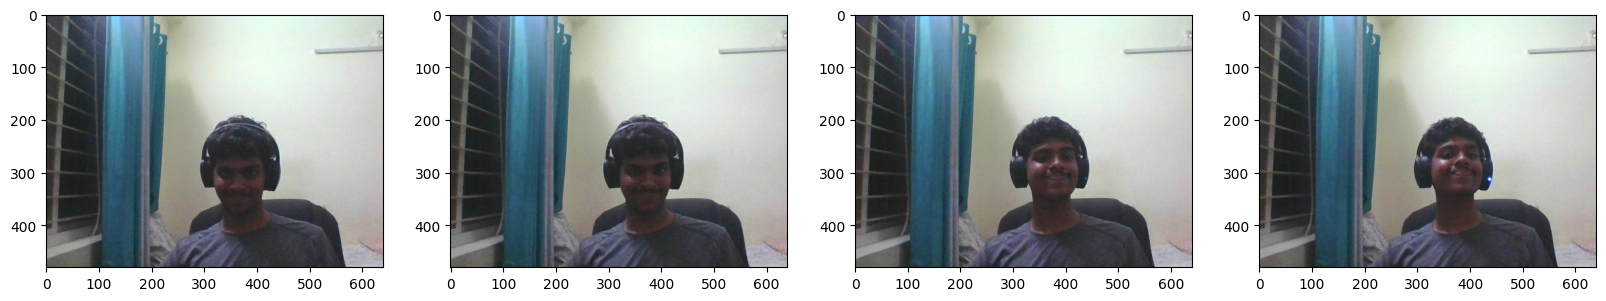

In [28]:
fix,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,image in enumerate(plot_images):
    ax[idx].imshow(image)
plt.show()

In [39]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels', filename)
        if os.path.exists(existing_filepath): 
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)  

In [7]:
import albumentations as alb

In [8]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))

In [7]:
img=cv2.imread(os.path.join('data','train','images','0f350b68-5f43-11f0-a424-d41b819bcb10.jpg'))

In [10]:
with open(os.path.join('data', 'train', 'labels', '0f350b68-5f43-11f0-a424-d41b819bcb10.json'), 'r') as f:
    label = json.load(f)

In [13]:
label['shapes'][0]['points']

[[215.49180327868854, 162.95081967213116],
 [392.54098360655735, 372.78688524590166]]

In [14]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [15]:
coords

[215.49180327868854,
 162.95081967213116,
 392.54098360655735,
 372.78688524590166]

In [16]:
coords = list(np.divide(coords, [640,480,640,480]))

In [17]:
coords

[0.33670594262295084,
 0.3394808743169399,
 0.6133452868852458,
 0.7766393442622951]

In [14]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

NameError: name 'augmentor' is not defined

In [13]:
augmented['image'].shape

NameError: name 'augmented' is not defined

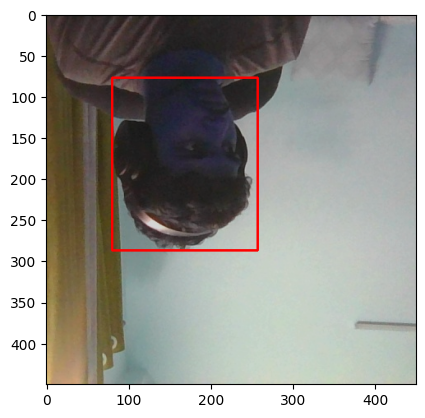

In [21]:
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)), 
                    (255,0,0), 2)

plt.imshow(augmented['image'])

In [10]:
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

        try: 
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

In [11]:
def preprocess_dataset(path_pattern):
    return (
        tf.data.Dataset.list_files(path_pattern, shuffle=False)
        .map(load_image)
        .map(lambda x: tf.image.resize(x, (120, 120)))
        .map(lambda x: x / 255)
    )

train_images = preprocess_dataset('aug_data/train/images/*.jpg')
test_images  = preprocess_dataset('aug_data/test/images/*.jpg')
val_images   = preprocess_dataset('aug_data/val/images/*.jpg')


In [12]:
train_images.as_numpy_iterator().next()

array([[[0.7088235 , 0.7088235 , 0.71666664],
        [0.7021446 , 0.703125  , 0.7026348 ],
        [0.6913603 , 0.69920343, 0.69528186],
        ...,
        [0.39871323, 0.41685048, 0.3428309 ],
        [0.39656863, 0.4014706 , 0.34509805],
        [0.3981005 , 0.39025736, 0.3408088 ]],

       [[0.6734681 , 0.6775735 , 0.6848652 ],
        [0.6833946 , 0.6902574 , 0.686826  ],
        [0.703799  , 0.703799  , 0.7047794 ],
        ...,
        [0.39558825, 0.41127452, 0.35637254],
        [0.38229167, 0.3911152 , 0.33621323],
        [0.37536764, 0.38192403, 0.32702205]],

       [[0.69485295, 0.7002451 , 0.70367646],
        [0.7324755 , 0.7398284 , 0.73737746],
        [0.7029412 , 0.7029412 , 0.7107843 ],
        ...,
        [0.4004902 , 0.40833333, 0.35735294],
        [0.3961397 , 0.40398285, 0.3608456 ],
        [0.3740809 , 0.38682598, 0.33566177]],

       ...,

       [[0.8998774 , 0.9900735 , 0.9194853 ],
        [0.8994485 , 0.9808211 , 0.91317403],
        [0.91072303, 0

In [13]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

In [14]:
def preprocess_labels(path_pattern):
    return (
        tf.data.Dataset.list_files(path_pattern, shuffle=False)
        .map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))
    )

train_labels = preprocess_labels('aug_data/train/labels/*.json')
test_labels  = preprocess_labels('aug_data/test/labels/*.json')
val_labels   = preprocess_labels('aug_data/val/labels/*.json')


In [15]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.2211, 0.2383, 0.6143, 0.7046], dtype=float16))

In [16]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(3840, 3840, 960, 960, 900, 900)

In [17]:
def prepare_dataset(images, labels, shuffle_buffer):
    return (
        tf.data.Dataset.zip((images, labels))
        .shuffle(shuffle_buffer)
        .batch(8)
        .prefetch(4)
    )

train = prepare_dataset(train_images, train_labels, 5000)
test  = prepare_dataset(test_images, test_labels, 1300)
val   = prepare_dataset(val_images, val_labels, 1000)


In [18]:

train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.3264 , 0.1377 , 0.7217 , 0.704  ],
        [0.541  , 0.3982 , 0.8813 , 0.806  ],
        [0.2605 , 0.3672 , 0.745  , 0.9136 ],
        [0.     , 0.     , 0.     , 0.     ],
        [0.2664 , 0.1846 , 0.616  , 0.5815 ],
        [0.1884 , 0.364  , 0.5454 , 0.792  ],
        [0.09454, 0.1724 , 0.4443 , 0.677  ],
        [0.06946, 0.3013 , 0.4812 , 0.815  ]], dtype=float16))

In [19]:

data_samples = train.as_numpy_iterator()

In [20]:
res = data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


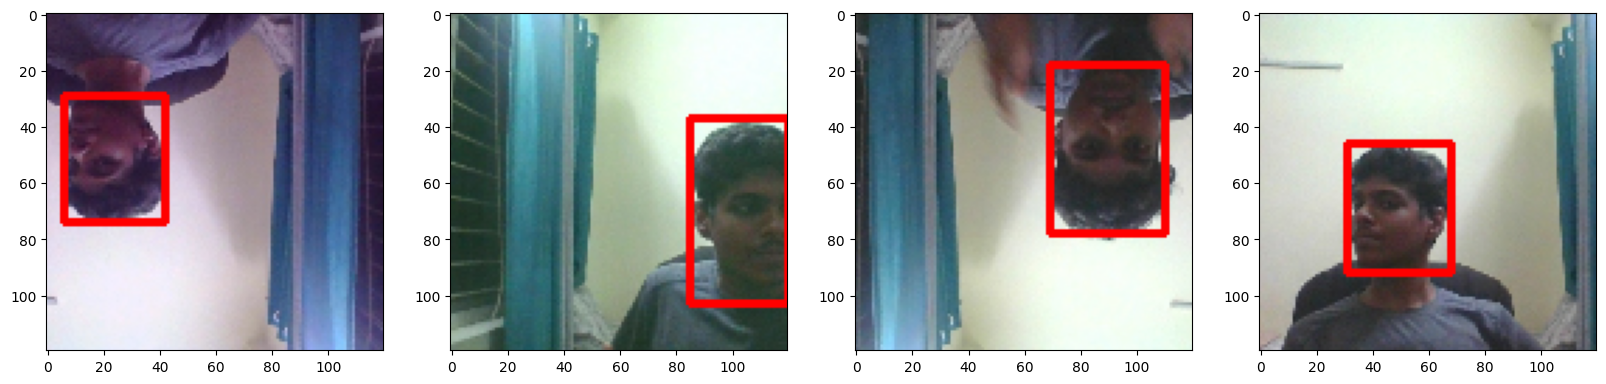

In [21]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx in range(4): 
    sample_image = res[0][idx].copy()  # Make the image writable
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(
        sample_image, 
        tuple(np.multiply(sample_coords[:2], [120, 120]).astype(int)),
        tuple(np.multiply(sample_coords[2:], [120, 120]).astype(int)), 
        (255, 0, 0), 
        2
    )

    ax[idx].imshow(sample_image)


In [22]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [23]:
vgg = VGG16(include_top=False)

In [24]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [25]:
def build_model():
    input_layer=Input(shape=(120,120,3))

    vgg=VGG16(include_top=False)(input_layer)

    #model
    f1=GlobalMaxPooling2D()(vgg)
    class1=Dense(2048,activation='relu')(f1)
    class2=Dense(1,activation='sigmoid')(class1)

    f2=GlobalMaxPooling2D()(vgg)
    regress1=Dense(2048,activation='relu')(f2)
    regress2=Dense(4,activation='sigmoid')(regress1)

    facetracker=Model(inputs=input_layer,outputs=[class2,regress2])
    return facetracker

In [26]:
facetracker = build_model()

In [27]:
facetracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, None, None,   14714688    ['input_2[0][0]']                
                                512)                                                              
                                                                                                  
 global_max_pooling2d (GlobalMa  (None, 512)         0           ['vgg16[0][0]']                  
 xPooling2D)                                                                                  

In [28]:

X, y = train.as_numpy_iterator().next()

In [29]:
X.shape

(8, 120, 120, 3)

In [30]:
classes, coords = facetracker.predict(X)

1/1 [==============================] - 38s 38s/step


In [31]:
classes, coords

(array([[0.5966797 ],
        [0.58640033],
        [0.59935164],
        [0.4582739 ],
        [0.5291169 ],
        [0.4889694 ],
        [0.57579565],
        [0.56787604]], dtype=float32),
 array([[0.3365992 , 0.38069373, 0.4261045 , 0.3705146 ],
        [0.32593334, 0.31439936, 0.3778234 , 0.43869105],
        [0.38532448, 0.32992235, 0.41085917, 0.433358  ],
        [0.32916608, 0.36888003, 0.42251918, 0.45469543],
        [0.39193273, 0.2939945 , 0.44953042, 0.441237  ],
        [0.351718  , 0.40032306, 0.42813855, 0.40016407],
        [0.39661047, 0.31425357, 0.3826    , 0.4722389 ],
        [0.35298815, 0.40366417, 0.433931  , 0.42585078]], dtype=float32))

In [32]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [33]:
from tensorflow.keras.optimizers import legacy

opt = legacy.Adam(learning_rate=0.0001, decay=lr_decay)


In [34]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [35]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [36]:

localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=2.400877>

In [37]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.57509416>

In [38]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=2.400877>

In [39]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [40]:
model = FaceTracker(facetracker)

In [41]:

model.compile(opt, classloss, regressloss)

In [42]:
logdir='logs'

In [43]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [44]:

hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
480/480 [==============================] - 83s 133ms/step - total_loss: 0.2800 - class_loss: 0.0972 - regress_loss: 0.2314 - val_total_loss: 0.0351 - val_class_loss: 2.1421e-04 - val_regress_loss: 0.0349
Epoch 2/10
480/480 [==============================] - 64s 115ms/step - total_loss: 0.0980 - class_loss: 0.0445 - regress_loss: 0.0757 - val_total_loss: 0.0063 - val_class_loss: 5.0979e-05 - val_regress_loss: 0.0062
Epoch 3/10
480/480 [==============================] - 65s 117ms/step - total_loss: 0.0834 - class_loss: 0.0391 - regress_loss: 0.0638 - val_total_loss: 0.0295 - val_class_loss: 3.1607e-05 - val_regress_loss: 0.0295
Epoch 4/10
480/480 [==============================] - 66s 119ms/step - total_loss: 0.0654 - class_loss: 0.0304 - regress_loss: 0.0502 - val_total_loss: 0.0131 - val_class_loss: 2.6226e-06 - val_regress_loss: 0.0131
Epoch 5/10
480/480 [==============================] - 65s 119ms/step - total_loss: 0.0523 - class_loss: 0.0235 - regress_loss: 0.0406 - val_

In [45]:
hist.history


{'total_loss': [0.020074309781193733,
  0.31645387411117554,
  0.02555483765900135,
  0.013518325984477997,
  0.006354319863021374,
  0.005713652353733778,
  0.006936424877494574,
  0.007859507575631142,
  0.0068054767325520515,
  0.012539765797555447],
 'class_loss': [0.0012433658121153712,
  0.16880767047405243,
  0.0002423771657049656,
  2.8551730792969465e-05,
  0.001770414412021637,
  0.00029320872272364795,
  0.000979093136265874,
  0.00038748953375034034,
  9.117275476455688e-05,
  0.000615644792560488],
 'regress_loss': [0.01945262774825096,
  0.23205003142356873,
  0.025433648377656937,
  0.013504049740731716,
  0.005469112657010555,
  0.0055670482106506824,
  0.0064468784257769585,
  0.007665763143450022,
  0.006759890355169773,
  0.01223194319754839],
 'val_total_loss': [0.03505634143948555,
  0.006270111072808504,
  0.029543425887823105,
  0.013064117170870304,
  0.03734654188156128,
  0.017983756959438324,
  0.004295732825994492,
  0.008341574110090733,
  0.009345695376396

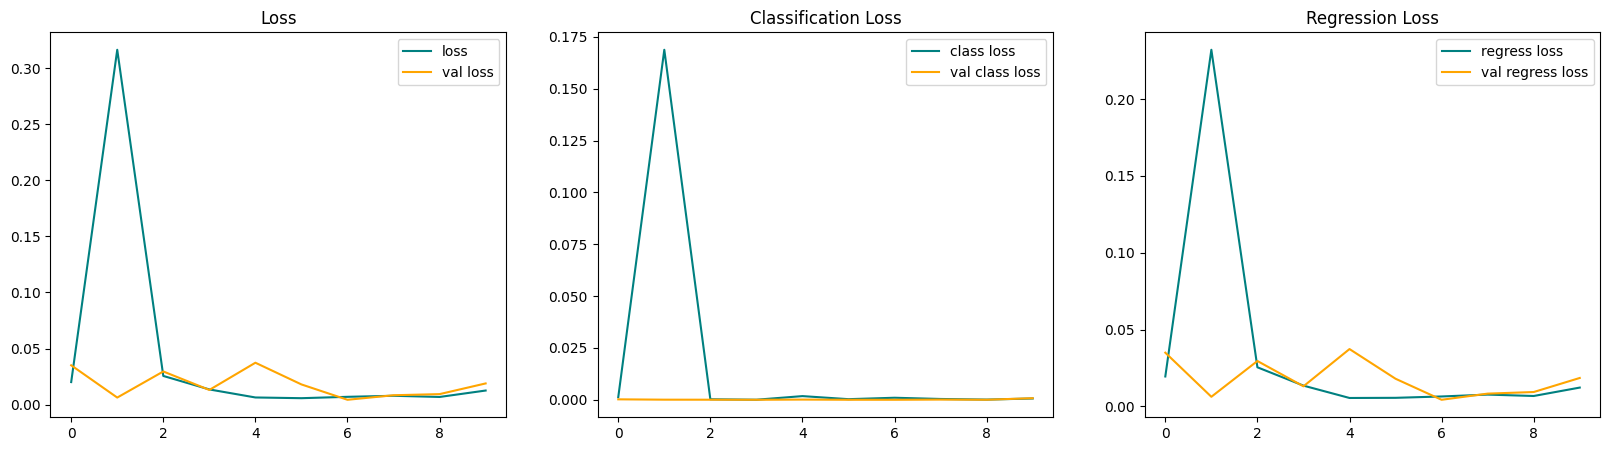

In [46]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

In [47]:
test_data = test.as_numpy_iterator()

In [48]:
test_sample = test_data.next()

In [49]:
yhat = facetracker.predict(test_sample[0])

1/1 [==============================] - 0s 40ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


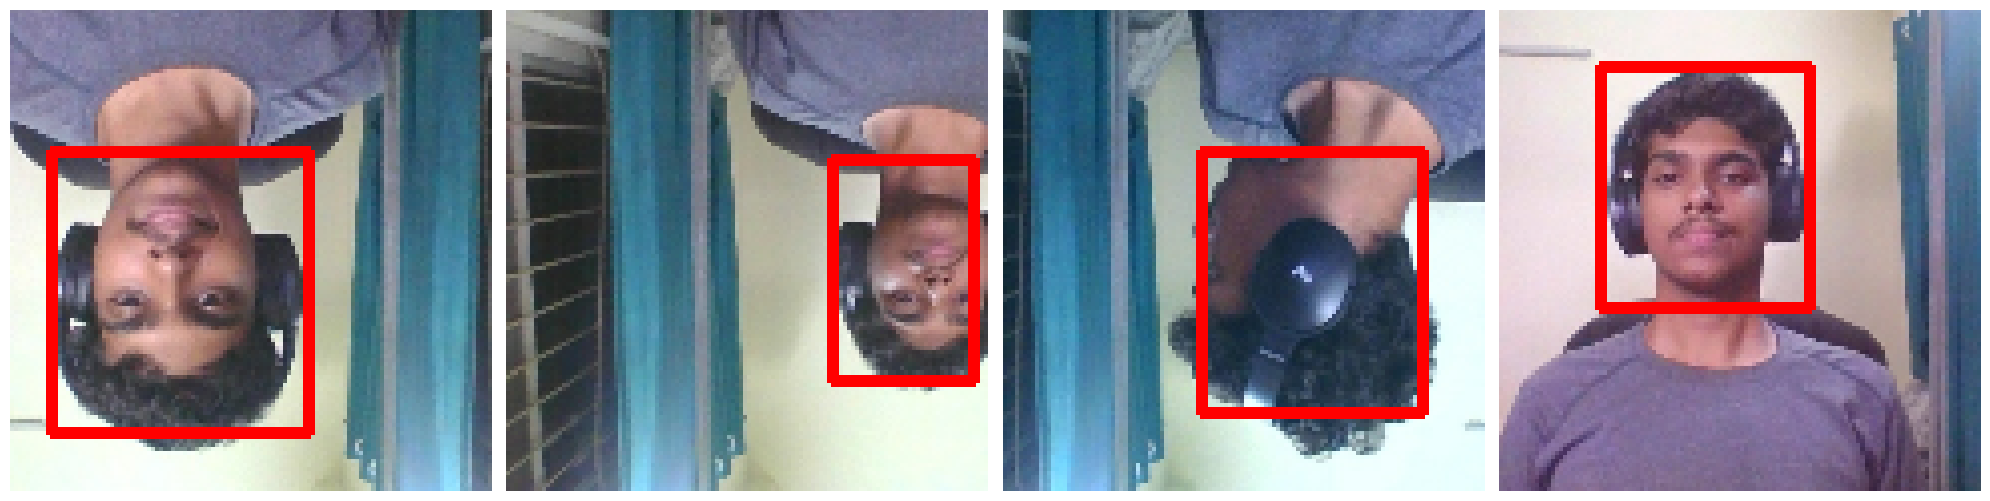

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

fig, ax = plt.subplots(ncols=4, figsize=(20, 20))

for idx in range(4): 
    # Make a writable copy of the image
    sample_image = test_sample[0][idx].copy()
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        cv2.rectangle(
            sample_image,
            tuple(np.multiply(sample_coords[:2], [120, 120]).astype(int)),
            tuple(np.multiply(sample_coords[2:], [120, 120]).astype(int)),
            (255, 0, 0),
            2
        )
    
    ax[idx].imshow(sample_image)
    ax[idx].axis("off")  # Optional: hide axis for cleaner view

plt.tight_layout()
plt.show()


In [52]:
from tensorflow.keras.models import load_model

In [53]:
facetracker.save('facetracker.h5')

In [54]:
facetracker = load_model('facetracker.h5')

In [60]:
cap = cv2.VideoCapture(1)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('EyeTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

error: OpenCV(4.12.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1295: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvDestroyAllWindows'
